In [1]:
import numpy as np
import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub 

from tensorflow.keras.applications.vgg16 import VGG16

Mount for Non Owner

In [2]:
import pathlib
data_train = 'D:/Backup/Bangkit/archive/Actual Set/train'
data_test = 'D:/Backup/Bangkit/archive/Actual Set/test'

In [13]:
#preprocessing data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
	data_train,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32
)

test_generator = test_datagen.flow_from_directory(
	data_test,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=32
)

Found 13850 images belonging to 3 classes.
Found 1303 images belonging to 3 classes.


In [14]:


base_model = VGG16(input_shape = (150, 150, 3), 
                          include_top = False, 
                          weights = 'imagenet')


for layer in base_model.layers:
    layer.trainable = False

In [15]:
from tensorflow.keras import Model
from tensorflow.keras import layers
x = layers.Flatten()(base_model.output)
x = layers.Dense(128, activation ='relu')(x)
x = layers.Dense (3, activation = 'softmax')(x)

model = Model (base_model.input, x)

In [16]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [18]:
history = model.fit(
    train_generator,
    epochs = 5,
    validation_data = test_generator,
    verbose = 1,
    validation_steps=3
) 

Epoch 1/5
433/433 [==============================] - 572s 1s/step - loss: 0.2908 - accuracy: 0.8858 - val_loss: 0.3935 - val_accuracy: 0.8021
Epoch 2/5
433/433 [==============================] - 517s 1s/step - loss: 0.2338 - accuracy: 0.9101 - val_loss: 0.7870 - val_accuracy: 0.7292
Epoch 3/5
433/433 [==============================] - 524s 1s/step - loss: 0.1965 - accuracy: 0.9261 - val_loss: 0.6486 - val_accuracy: 0.7604
Epoch 4/5
433/433 [==============================] - 515s 1s/step - loss: 0.1839 - accuracy: 0.9304 - val_loss: 0.6597 - val_accuracy: 0.7083
Epoch 5/5
433/433 [==============================] - 515s 1s/step - loss: 0.1667 - accuracy: 0.9383 - val_loss: 0.2690 - val_accuracy: 0.8333


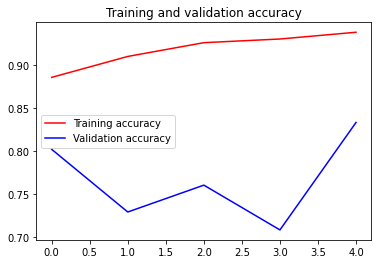

<Figure size 432x288 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']


epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
tf.saved_model.save(model, LUNGCARE_TEMP_MODEL)

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(LUNGCARE_TEMP_MODEL)

In [ ]:
tflite_model = converter.convert()
tflite_model_file= 'converted_model.tflite'

In [23]:
export_dir = 'D:/Backup/Bangkit/main_model'
tf.saved_model.save(model, export_dir)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: D:/Backup/Bangkit/main_model\assets


In [25]:
import pathlib
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path('D:/Backup/Bangkit/tflite_model')
tflite_model_file.write_bytes(tflite_model)

63067860

In [45]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

path = 'D:/Backup/Bangkit/testings/abnormal.png'
img = load_img(path, target_size=(150,150))
x = img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print_classes(classes[0])
print(classes)

def print_classes(classes):
    print(f"Covid = {int(classes[0] * 100)} %")
    print(f"Normal = {int(classes[1] * 100)} %")
    print(f"Pneumonia = {int(classes[2] * 100)} %")

Covid = 99 %
Normal = 0 %
Pneumonia = 0 %
[[0.99595827 0.00186961 0.00217209]]
